In [1]:
import pandas as pd
import warnings 
import seaborn as sns
import numpy as np
import matplotlib as plt
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Table of Contents

* [1. Pre-Processing](#1)

# <p id = "1" style="font-family:arial;background-color:#2A93D5;color:#FFFFFF;font-size: 150%;text-align:center;border-radius: 0px 15px 15px 0px;border-style: solid;border-color: #2483bf;">1.PRE-PROCESSING</p>

In [2]:
data = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Checks the null distribution between columns:**

In [4]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Drops the rows with null values:**

In [5]:
data.drop(index=(data[data['Income'].isna()].index), axis = 0, inplace=True)

**Conversion of column type:**

In [6]:
data['Education'] = data['Education'].astype('category')
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

**Calculating the year and day difference with Dt_Customer column.**

In [7]:
from datetime import datetime
currentYear = datetime.now().year

In [8]:
data['Year_Customer'] = data['Dt_Customer'].dt.year.apply(lambda x : currentYear - x)
data['DayDiff_Customer'] = data['Dt_Customer'].apply(lambda x : datetime.now() - x)
data['DayDiff_Customer'] = data['DayDiff_Customer'].dt.days
data.drop(['Dt_Customer'], axis = 1, inplace = True)

# Age Variable

**Calculates the age of every customer and drops the Year_Birth column:**

In [9]:
data['Age'] = data['Year_Birth'].apply(lambda x : currentYear - x)
# Drops the Year_Birth column
data.drop(['Year_Birth'], axis = 1, inplace = True)
data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,DayDiff_Customer,Age
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,11,3938,66
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,9,3092,69
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,10,3439,58
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,9,3032,39
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,9,3288,42


**The distribution of Age variable:**

<AxesSubplot:xlabel='Age', ylabel='Count'>

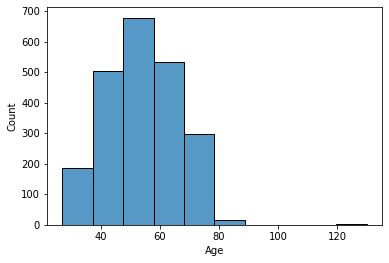

In [10]:
sns.histplot(data['Age'], bins=10)

**The age distribution rounds around 50. There are some outliers above 100.**

In [11]:
data['Age'].max()

130

In [12]:
data[data['Age'] > 100]

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,DayDiff_Customer,Age
192,7829,2n Cycle,Divorced,36640.0,1,0,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,10,3403,123
239,11004,2n Cycle,Single,60182.0,0,1,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,9,3170,130
339,1150,PhD,Together,83532.0,0,0,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,10,3403,124


**Because of that the age group does not frequent, it could be removed from dataset to make the feature model work well.**

**The code below drops the customers which is over the age of 100:**

In [13]:
data.drop(index=(data[data['Age'] > 100].index), axis = 0, inplace=True)

**Setting ticks for X axis of age distribution histogram:**

In [14]:
minAgeTick = int(data['Age'].min() - (data['Age'].min() % 5))
minAgeTick

25

In [15]:
maxAgeTick = int(((data['Age'].max() // 5) + 1) * 5)
maxAgeTick

85

In [16]:
ticks = list(range(minAgeTick,maxAgeTick+1, 5))
ticks

[25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]

**Histogram of the Age Variable**

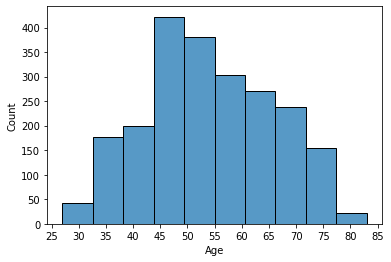

In [17]:
histogram_plot = sns.histplot(data['Age'],bins=10)
histogram_plot.set_xticks(ticks)

**The histogram is more clear for observation now.**

In [18]:
def age_group(age):
    if age <= 25:
        age_group = 'Young Adult'
    elif (age > 25) & (age <= 64):
        age_group = 'Adult'
    else:
        age_group = 'Elder'
    return age_group

In [19]:
data['Age_Group'] = data['Age'].apply(lambda x: age_group(x))

<AxesSubplot:xlabel='Age_Group', ylabel='count'>

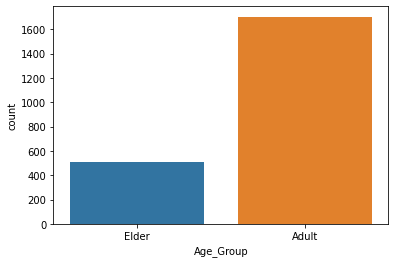

In [20]:
sns.countplot(data=data, x="Age_Group")

In [21]:
round((data['Age_Group'].value_counts(normalize=True) * 100),0)

Adult    77.0
Elder    23.0
Name: Age_Group, dtype: float64

# Distribution of Education

<AxesSubplot:xlabel='Education', ylabel='count'>

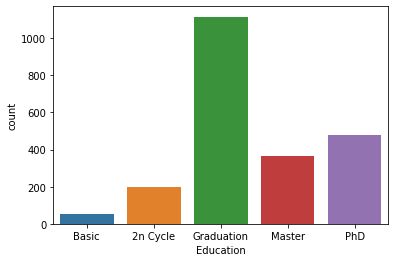

In [22]:
sns.countplot(data=data, x="Education", order=['Basic','2n Cycle','Graduation', 'Master', 'PhD'])

# Percentage Distribution

In [23]:
round((data['Education'].value_counts(normalize=True) * 100),0)

Graduation    50.0
PhD           22.0
Master        16.0
2n Cycle       9.0
Basic          2.0
Name: Education, dtype: float64

# Marital Status Variable

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

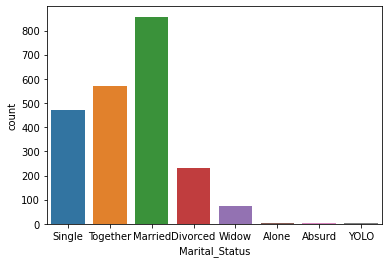

In [24]:
sns.countplot(data=data, x="Marital_Status")

**There are some categories which has very low value.
Drops the non-freqent categories:**

In [25]:
data.drop(index=(data[data['Marital_Status'] == 'Alone'].index), axis = 0, inplace = True)
data.drop(index=(data[data['Marital_Status'] == 'Absurd'].index), axis = 0, inplace = True)
data.drop(index=(data[data['Marital_Status'] == 'YOLO'].index), axis = 0, inplace = True)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

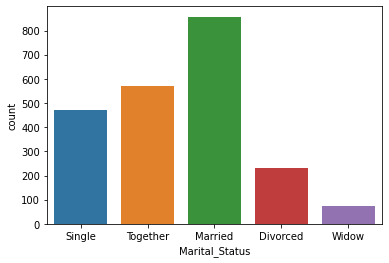

In [26]:
marital_status_countplot = sns.countplot(data=data, x="Marital_Status")
#for i in marital_status_countplot.containers:
#    marital_status_countplot.bar_label([i.datavalues])
marital_status_countplot

# **Percentage Distribution of Marital Status**

In [27]:
round((data['Marital_Status'].value_counts(normalize=True) * 100),0)

Married     39.0
Together    26.0
Single      21.0
Divorced    10.0
Widow        3.0
Name: Marital_Status, dtype: float64